# Teoria chaosu

## Ciekawe materiały
* [Niesamowita książka Iana Stewarta: "Does God Play Dice?"](https://www.empik.com/czy-bog-gra-w-kosci-stewart-ian,318219,ksiazka-p)
* [Książka E. Lorenza o chaosie](https://www.amazon.com/Essence-Chaos-Jessie-John-Lectures/dp/0295975148)
* [Wikipedia o Teorii Chaosu](https://en.wikipedia.org/wiki/Chaos_theory)
* [Wikipedia o równaniach Lorenza](https://en.wikipedia.org/wiki/Lorenz_system)
* [Ciekawe rozważania o chaosie i losowości](https://medium.com/intuitionmachine/there-is-no-randomness-only-chaos-and-complexity-c92f6dccd7ab)
* [Atraktor Roeslera](https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor)
* [Atraktor Kuramoto-Shivashinsky'ego](https://en.wikipedia.org/wiki/Kuramoto%E2%80%93Sivashinsky_equation)


## Słowo wstępu

Pogodę można przewidywać na dwa sposoby: synoptycznie (wróżąc z chmur, wyżów, niżów, wilgotności, etc.) oraz numerycznie. W tym drugim przypadku zbieramy dane o zmianach możliwie największej ilości parametrów w czasie i staramy się wymyślić model, który w dobry sposób opisze nasze zmiany. Jak w wielu dziedzinach życia okazuje się, że jego wyliczenie sprowadza się do rozwiązania równania różniczkowego. Jednak kiedy wiele lat temu próbowano rozwiązać te równania na komputerze, zauważono jedną rzecz: rozwiązanie równania dawało prognozy dokładne mniej więcej przez trzy dni. Zwiększanie dokładności obliczeń nie pomagało wiele. Okazało się, że mamy do czynienia z równaniem, którym nawet najmniejsze zmiany warunków początkowych powodują wielkie zmiany wyników. Edward Lorenz wydestylował minimalny przykład ("repro"):

$
{\begin{aligned}{\frac {\mathrm {d} x}{\mathrm {d} t}}&=\sigma (y-x),\\{\frac {\mathrm {d} y}{\mathrm {d} t}}&=x(\rho -z)-y,\\{\frac {\mathrm {d} z}{\mathrm {d} t}}&=xy-\beta z.\end{aligned}}
$

To układ równań różniczkowych "po czasie": opisuje zmiany pewnego systemu w czasie (w tym wypadku jest to układ trzech zmiennych). Jego rozwiązanie to trajektoria: funkcja zmiany położenia w czasie. Jeśli zrobimy wykres rzutu tej trajektorii na któreś dwa z trzech wymiarów, dostaniemy taki oto piękny obrazek:

![lorenz_attractor](https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif)

Kulka porusza się po trajektorii wraz z upływającym czasem. Takie zachowanie nazywamy **chaotycznym**. Zauważmy, że nie jest to zachowanie losowe: gdybyśmy liczyli z nieskończoną dokładnością, nie byłoby problemów z przewidzeniem, jak wygląda trajektoria.

## Zadanie

Napisz program, który będzie rysował trajektorię dla któregoś z chaotycznych atraktorów: Lorenza, Roeslera, Kuramoto-Shivashinsky'ego (lub innych znalezionych). Rozwiązanie wymaga rozwiązania równania różniczkowego. W Pythonie można to zrobić np. funkcją [`odeint` z pakietu SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint).

Wielkim plusem będzie interaktywność programu: warto zbadać, czy układ ma chaotyczne właściwości dla wszystkich zestawów parametrów, czy tylko dla pewnego ich podzbioru.

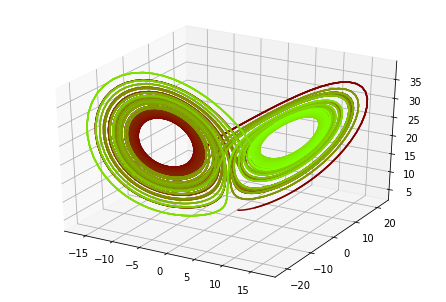

In [2]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot
from mpl_toolkits.mplot3d import axes3d, Axes3D

n = 5555
s = 55
sigma = 10
beta = 8/3
rho = 23.96
u0 = 1
v0 = 2
w0 = 3
t_frames = np.linspace(0, 100, 10000)

def lorenz_equations(X, t, sigma, beta, rho):
    y, x, z = X
    up = -sigma*(y - x)
    vp = rho*y - x - y*z
    wp = -beta*z + y*x
    return up, vp, wp

f = scipy.integrate.odeint(lorenz_equations, (u0, v0, w0), t_frames, args=(sigma, beta, rho))
x, y, z = f.T
fig = matplotlib.pyplot.figure()
ax = Axes3D(fig)
c = np.linspace(0,1,n)
for i in range(0,n,10):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(0.5,c[i],0))


matplotlib.pyplot.show()